In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean

### 1.Visualize and interpret the pattern of this time-series

In [3]:
sales_pd = pd.read_excel("./sales.xls",encoding="utf8")
sales_pd = sales_pd.set_index("month")
sales_pd

,sales
month,
1,5384
2,8081
3,10282
4,9156
5,6118
6,9139
7,12460
8,10717
9,7825


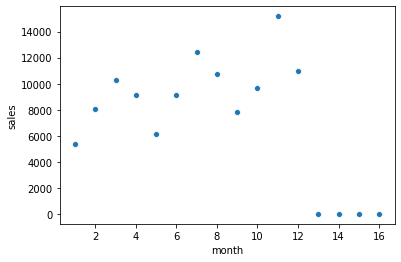

In [4]:
sns.scatterplot(sales_pd.index,sales_pd['sales'])

In [55]:
type(sales_pd.loc[10]['sales'])

numpy.int64

have seasonality 

### moving averge method 

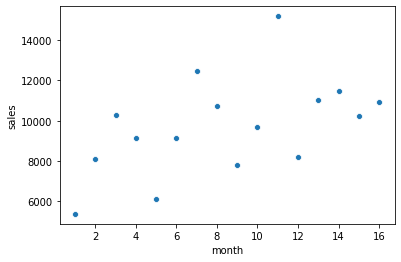

In [54]:
#moving average method
for index in range(13,17):
    sales_pd.loc[index].sales = mean([sales_pd.loc[index-1].sales,sales_pd.loc[index-2].sales,sales_pd.loc[index-3].sales])
sns.scatterplot(sales_pd.index,sales_pd['sales'])

### exponential smoothing 

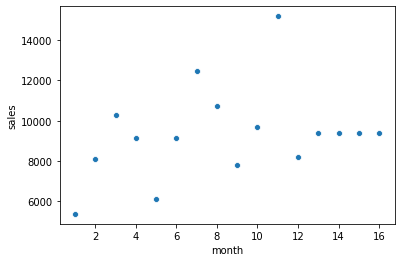

In [53]:
alpha=0.8
for idx in range(13,17):
    value = 0
    # index is F_{t} t 
    for pw in range(0,idx-1):
        #rint(alpha*(1-alpha)**pw*sales_pd.loc[idx-1-pw].sales)
        value = value + alpha*(1-alpha)**pw*sales_pd.loc[idx-1-pw].sales
        #rint(value)
    sales_pd.loc[idx].sales = value
    #rint(value)
    #rint("##############")

sns.scatterplot(sales_pd.index,sales_pd['sales'])

### linear regression

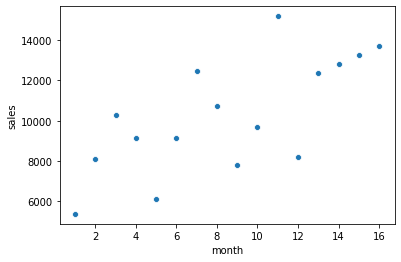

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np
lr = LinearRegression()
lr.fit(np.array(sales_pd.index).reshape(-1,1),sales_pd['sales'])
#lr.predict([[idx]])
for idx in range(13,17):
    sales_pd.loc[idx].sales = lr.predict([[idx]])[0]
sns.scatterplot(sales_pd.index,sales_pd['sales'])

### Predict future demand in month 13,14,15,16 with seasonality

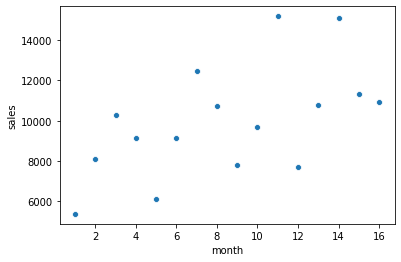

In [56]:
avg = []
for x in range(0,3):
    avg.append(mean([sales_pd.loc[x*4+1].sales,sales_pd.loc[x*4+2].sales,sales_pd.loc[x*4+3].sales,sales_pd.loc[x*4+4].sales]))
avg

# array of season index
t_index=[]
for g in range(0,3):
    #season index for a group
    s_index= []
    for e in range(1,5):
        s_index.append(sales_pd.loc[g*4+e].sales/avg[g])
    t_index.append(s_index)

avg_4 = avg[2]+mean([avg[2]-avg[1],avg[1]-avg[0]])
avg_4
avg_index =[]

for e in range(0,4):
    avg_index.append(mean([t_index[0][e],t_index[1][e],t_index[2][e]]))
avg_index

for e in range(0,4):
    sales_pd.loc[12+e].sales = avg_4*avg_index[e]
sns.scatterplot(sales_pd.index,sales_pd['sales'])

### 1. Basics of Recommendation Algorithm

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
from math import factorial
ict = [4,3,2,3]
med = [1,2,3,1]
bus = [np.nan,2,1,np.nan]
env = [4,3,np.nan,np.nan]
vec_ict_to_bus = ict[1:3]
vec_med_to_bus = med[1:3]

vec_ict_to_env = ict[0:2]
vec_med_to_env = med[0:2]

vec_bus = bus[1:3]
vec_env = env[0:2]

sim_ict_bus = cosine_similarity([vec_ict_to_bus,vec_bus])[0][1]
sim_med_bus = cosine_similarity([vec_med_to_bus,vec_bus])[0][1]
sim_ict_env = cosine_similarity([vec_ict_to_env,vec_env])[0][1]
sim_med_env = cosine_similarity([vec_med_to_env,vec_env])[0][1]

bar_ict = mean(ict)
bar_med = mean(med)
bar_bus = mean([2,1])
bar_env = mean([4,3])
bus[3] = bar_bus + sum([sim_ict_bus*(ict[3]-bar_ict),sim_med_bus*(med[3]-bar_med)])/sum([sim_ict_bus,sim_med_bus])
bus[0] =  bar_bus + sum([sim_ict_bus*(ict[0]-bar_ict),sim_med_bus*(med[0]-bar_med)])/sum([sim_ict_bus,sim_med_bus])
#bus
env[2] = bar_env + sum([sim_ict_env*(ict[2]-bar_ict),sim_med_env*(med[2]-bar_env)])/sum([sim_ict_env,sim_med_env])
env[3] = bar_env + sum([sim_ict_env*(ict[3]-bar_ict),sim_med_env*(med[3]-bar_env)])/sum([sim_ict_env,sim_med_env])
env

# predict accuray MAD, and rank accuracy
predict_acc = mean([abs(env[2]-2),abs(env[3]-4),abs(bus[0]-1),abs(bus[3]-2)])
predict_acc



0.9874352995830178

In [102]:

c = factorial(3)/factorial(2)
deno = factorial(4)/factorial(2)/factorial(2)

des_pred = [ict[0],med[0],bus[0],env[0]]
des_tru = [4,1,1,4]
d = 0
for e in range(0,4):
    #print(bus[0]<=des_pred[e])
    #print(des_tru[2] <= des_tru[e])
    if (bus[0]<=des_pred[e]) == (des_tru[2] <= des_tru[e]):
        continue
    else:
        d = d+1
        #print(d)
#print(d)
tao = c-d/(deno)
print(tao)

2.8333333333333335
